In [2]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage as sk
import skimage.io as skio

In [3]:
def load_in_image(imname):
    # read in the image
    im = skio.imread(imname)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)

    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(int)

    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    
    return b, g, r

In [4]:
def euc_dist(image1, image2):
    return np.sqrt(np.sum((image1-image2)**2))

In [5]:
def l2_dist(image1, image2):
    return np.sqrt(np.sum((image1-image2)**2))

In [89]:
# def align(top_image, base_image):
#     best_value = float('inf')
#     best_shift = (0, 0)
#     size = 15
    
#     for x in range(-size, size):
#         for y in range(-size, size):
#             shifted_image = np.roll(top_image, shift = (x, y), axis = (1, 0))
#             dist_value = euc_dist(shifted_image, base_image)
            
#             if best_value > dist_value:
#                 best_value = dist_value 
#                 best_shift = (x, y)
                
#     aligned_image = np.zeros_like(top_image)
#     aligned_image = np.roll(top_image, shift = best_shift, axis = (1, 0))
    
#     return aligned_image, best_shift

def get_shift(top_image, base_image):
    best_value = float('-inf')
    best_shift = (0, 0)
    search_window=10

    for x in range(-search_window, search_window + 1):
        for y in range(-search_window, search_window + 1):
            shifted_image = np.roll(top_image, shift=(x, y), axis=(1, 0))
            dist_value = ssim(shifted_image, base_image, data_range=base_image.max() - base_image.min())

            if dist_value > best_value:
                best_value = dist_value
                best_shift = (x, y)
    aligned_image = np.zeros_like(top_image)
    aligned_image = np.roll(top_image, shift = best_shift, axis = (1, 0))

    return aligned_image, best_shift

In [11]:
def create_output(r, g, b, output_name):
    im_out = np.dstack([r, g, b])
    skio.imsave(output_name, im_out)

In [17]:
create_output(r, g, b, "out_path/monastery_before_alignment.jpg")

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [12]:
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

In [90]:
b, g, r = load_in_image("data/monastery.jpg")

ab, best_shift_b = align(b, g)
ar, best_shift_r = align(r, g)

create_output(ar, g, ab, "out_path/monastery_output.jpg")
print("blue color channel displacement vector:", best_shift_b)
print("red color channel displacement vector:", best_shift_r)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


blue color channel displacement vector: (0, 6)
red color channel displacement vector: (1, 6)


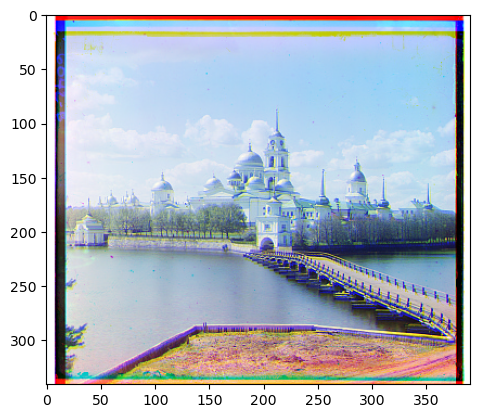

In [16]:
plt.imshow(np.stack((ar, g, ab), axis = -1))

In [103]:
b, g, r = load_in_image("data/cathedral.jpg")

ab, best_shift_b = align(b, g)
ar, best_shift_r = align(r, g)

create_output(r, ag, ab, "out_path/cathedral_output.jpg")
print("green color channel displacement vector:", best_shift_g)
print("blue color channel displacement vector:", best_shift_b)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


green color channel displacement vector: (0, -7)
blue color channel displacement vector: (1, -1)


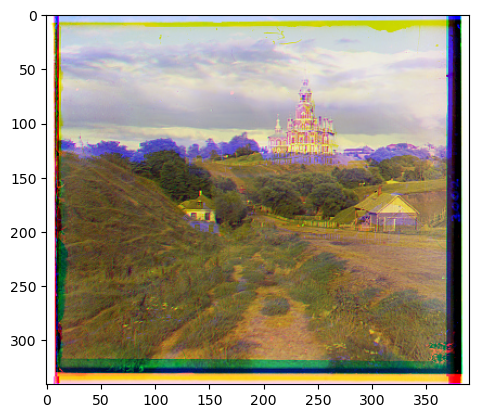

In [104]:
plt.imshow(np.stack((r, ag, ab), axis = -1))

In [108]:
b, g, r = load_in_image("data/tobolsk.jpg")

ab, best_shift_b = align(b, g)
ar, best_shift_r = align(r, g)

create_output(ar, g, ab, "out_path/tobolsk_output.jpg")
print("blue color channel displacement vector:", best_shift_b)
print("red color channel displacement vector:", best_shift_r)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


blue color channel displacement vector: (-2, -3)
red color channel displacement vector: (1, 4)


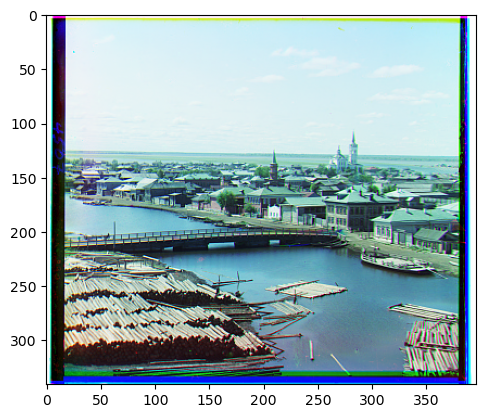

In [107]:
plt.imshow(np.stack((ar, g, ab), axis = -1))

# part 2 

In [20]:
from skimage.transform import rescale
from skimage.metrics import structural_similarity as ssim

In [33]:
# ssim_operation = ssim(img, img, data_range=img.max() - img.min())

In [36]:
# previous implementation that i gave up on and redid in the next cell
# doing both layers proved to be convoluted and the different layers sitation made it hard to debug
def image_pyramid_trash(b, g, r, layers, original_b, original_g, original_r, best_shift_b = 0, best_shift_r = 0):
    # base case
    if layers == 0:    
        # resizing best shift
#         best_shift_b = (best_shift_b[0] * 2, best_shift_b[1] * 2)
#         best_shift_r = (best_shift_r[0] * 2, best_shift_r[1] * 2)
        
        # rolling images based on best shifts
        aligned_image_b = np.zeros_like(original_b)
        aligned_image_b = np.roll(original_b, shift = best_shift_b, axis = (1, 0))

        aligned_image_r = np.zeros_like(original_r)
        aligned_image_r = np.roll(original_r, shift = best_shift_r, axis = (1, 0))

        return aligned_image_b, original_g, aligned_image_r 
    
    # any other size
    if layers >= 1:                
        # rescaling to smallest 
        scale_to = 1.0 / (2**layers)
        b_rescale = rescale(original_b, scale_to, anti_aliasing=True)
        g_rescale = rescale(original_g, scale_to, anti_aliasing=True)
        r_rescale = rescale(original_r, scale_to, anti_aliasing=True)
        
        # create new aligned image based on prev best_shift - not done for the smallest image
#         if best_shift_b != 0:
#             aligned_image_b = np.zeros_like(b_rescale)
#             aligned_image_b = np.roll(b_rescale, shift = best_shift_b, axis = (1, 0))

#             aligned_image_r = np.zeros_like(r_rescale)
#             aligned_image_r = np.roll(r_rescale, shift = best_shift_r, axis = (1, 0))
#         else: 
#             aligned_image_b = np.zeros_like(b_rescale)
#             aligned_image_r = np.zeros_like(r_rescale)
        
        # reasign aligned images and best shift
        aligned_image_b, best_shift_b = align(b_rescale, g_rescale)
        aligned_image_r, best_shift_r = align(r_rescale, g_rescale)
        
        plt.imshow(np.stack((aligned_image_r, g_rescale, aligned_image_b), axis = -1))
        
        # resize best shifts
        best_shift_b = (best_shift_b[0] * 2, best_shift_b[1] * 2)
        best_shift_r = (best_shift_r[0] * 2, best_shift_r[1] * 2)
        
        return image_pyramid(aligned_image_b, g_rescale, aligned_image_r, layers - 1, original_b, original_g, original_r, best_shift_b, best_shift_r)

In [ ]:
# wrote a displacement calculator method using ssim instead of euclidian distance
def get_shift(top_image, base_image):
    best_value = float('-inf')
    best_shift = (0, 0)
    search_window=10

    for x in range(-search_window, search_window + 1):
        for y in range(-search_window, search_window + 1):
            shifted_image = np.roll(top_image, shift=(x, y), axis=(1, 0))
            dist_value = ssim(shifted_image, base_image, data_range=base_image.max() - base_image.min())

            if dist_value > best_value:
                best_value = dist_value
                best_shift = (x, y)

    return best_shift

In [58]:
def image_pyramid(top_image, base_image, min_size=500000, search_window=15):
    # going to smallest level, got the idea of doing it will min_size from abudhiraja project
    if top_image.size < min_size:
        return get_shift(top_image, base_image, search_window)

    # rescaling to smallest 
    scale_factor = 0.5
    top_image_small = rescale(top_image, scale_factor, anti_aliasing=True)
    base_image_small = rescale(base_image, scale_factor, anti_aliasing=True)

    best_shift_small = image_pyramid(top_image_small, base_image_small, min_size, search_window)

    # rescale the shift and search window for the larger image
    best_shift_large = (best_shift_small[0] * 2, best_shift_small[1] * 2)
    search_window_large = 2

    # reasign aligned images and best shift
    aligned_image = np.roll(top_image, shift=best_shift_large, axis=(1, 0))
    final_shift = get_shift(aligned_image, base_image, search_window_large)

    # adjust final shift based on previous shifts
    return (final_shift[0] + best_shift_large[0], final_shift[1] + best_shift_large[1])

In [ ]:
def align_images(top_image, base_image):
    best_shift = image_pyramid(top_image, base_image)
    aligned_image = np.roll(top_image, shift=best_shift, axis=(1, 0))
    
    return aligned_image, best_shift

In [59]:
b, g, r = load_in_image("data/church.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

In [61]:
print("blue color channel displacement vector:", best_shift_b)
print("red color channel displacement vector:", best_shift_r)

blue color channel displacement vector: (0, 6)
red color channel displacement vector: (1, 6)


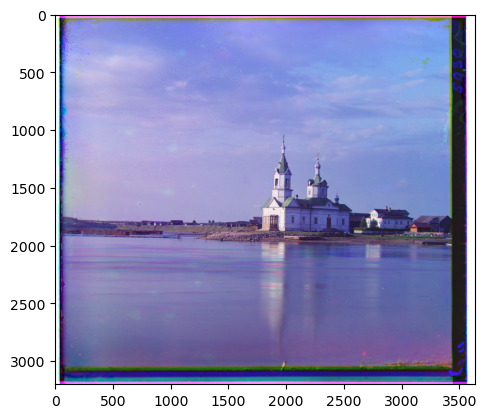

In [62]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/church.tif")

In [64]:
b, g, r = load_in_image("data/lady.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

In [67]:
print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-8, -57)
red color channel displacement vector: (3, 63)


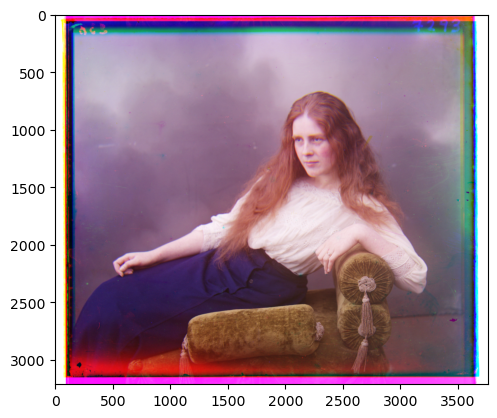

In [65]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/lady.tif")

In [69]:
b, g, r = load_in_image("data/melons.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-10, -88)
red color channel displacement vector: (4, 96)


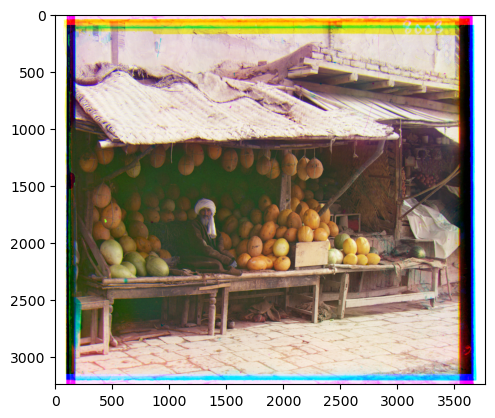

In [70]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/melons.tif")

In [71]:
b, g, r = load_in_image("data/train.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (2, -40)
red color channel displacement vector: (27, 42)


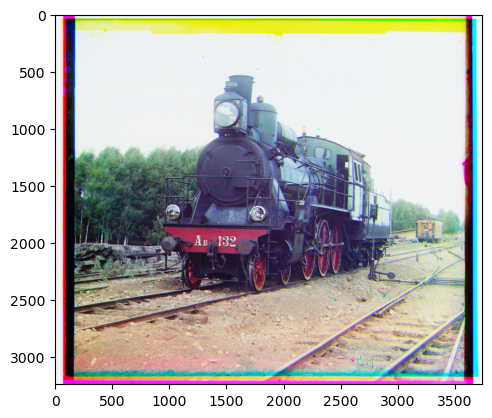

In [72]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/train.tif")

In [73]:
b, g, r = load_in_image("data/sculpture.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

In [74]:
print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (11, -33)
red color channel displacement vector: (-16, 107)


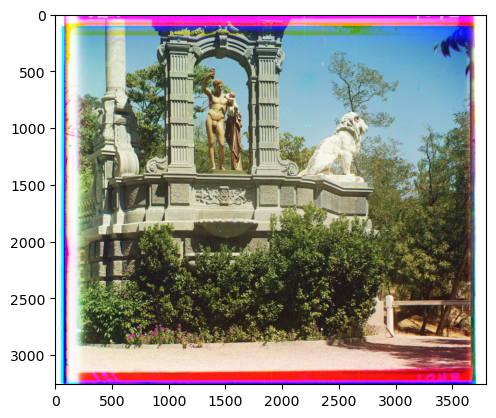

In [75]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/sculpture.tif")

In [77]:
b, g, r = load_in_image("data/self_portrait.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-28, -78)
red color channel displacement vector: (8, 98)


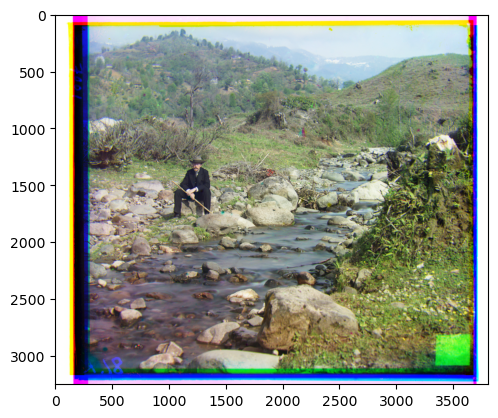

In [78]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/self_portrait.tif")

In [79]:
b, g, r = load_in_image("data/emir.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-21, -50)
red color channel displacement vector: (17, 57)


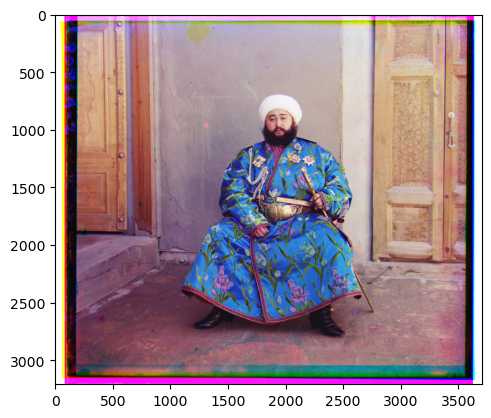

In [80]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/emir.tif")

In [81]:
b, g, r = load_in_image("data/harvesters.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-14, -59)
red color channel displacement vector: (-2, 64)


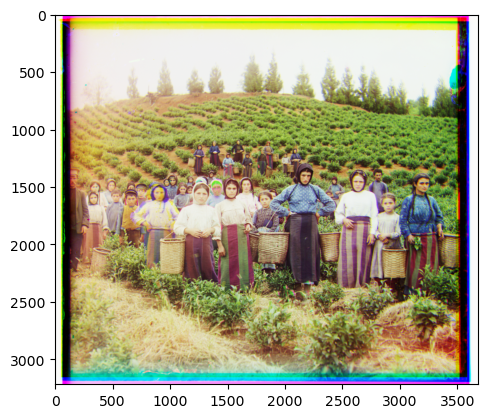

In [82]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/harvesters.tif")

In [83]:
b, g, r = load_in_image("data/icon.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-16, -39)
red color channel displacement vector: (5, 48)


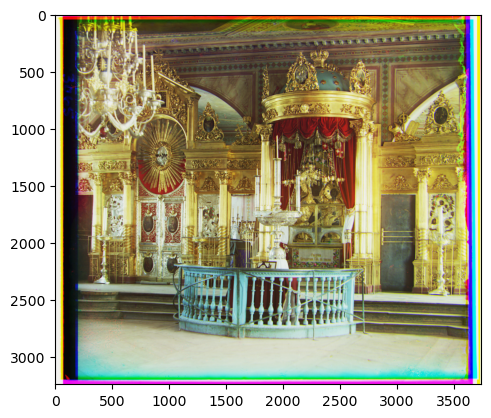

In [84]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/icon.tif")

In [85]:
b, g, r = load_in_image("data/onion_church.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-24, -52)
red color channel displacement vector: (10, 57)


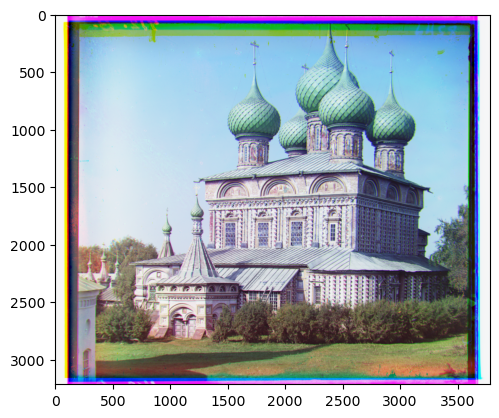

In [86]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/onion_church.tif")

In [87]:
b, g, r = load_in_image("data/three_generations.tif")

ab, blue_channel_disp = align_images(b, g)
ar, red_channel_disp = align_images(r, g)

print("blue color channel displacement vector:", blue_channel_disp)
print("red color channel displacement vector:", red_channel_disp)

blue color channel displacement vector: (-15, -57)
red color channel displacement vector: (-5, 58)


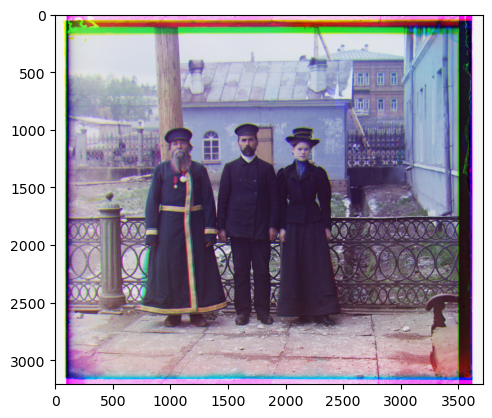

In [88]:
plt.imshow(np.stack((ar, g, ab), axis = -1))
create_output(ar, g, ab, "out_path/three_generations.tif")